In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import optuna

EPSILON = 1e-6

In [17]:
def kde_plot(positive_class, negative_class):
    sns.kdeplot(positive_class, color="r", label="Positive Class", fill=True)
    sns.kdeplot(negative_class, color="b", label="Negative Class", fill=True)
    
    plt.xlabel("Probability")
    plt.ylabel("Density")
    plt.title("Probability Density Function")
    plt.legend()
    plt.show()

In [18]:
def plot_threshold_plot(recall_vals, tnr_valus, thresholds, max_harmonic_mean_index):
    harmonic_mean = (
        2 
        * (np.array(recall_vals) * np.array(tnr_valus))
        / (np.array(recall_vals) + np.array(tnr_valus) + EPSILON)
    )

    max_harmonic_mean_threshold = thresholds[max_harmonic_mean_index]
    max_harmonic_mean_value = harmonic_mean[max_harmonic_mean_index]

    x_idx = 0.5

    thresholds_id = np.where(thresholds == x_idx)[0][0]

    plt.figure(figsize=(8, 6))
    for vals, label in [(recall_vals, "Recall"), (tnr_valus, "TNR"), (harmonic_mean, "Harmonic Mean")]:
        plt.plot(thresholds, vals, label=label, alpha=0.5)

    plt.xlabel("Thresholds")
    plt.ylabel("Value")
    plt.title(
        f"Metrics vs Thresholds\nMax Harmonic Mean: {max_harmonic_mean_value*100:.2f} at {max_harmonic_mean_threshold*100:.2f}\n Recall: {recall_vals[thresholds_id]*100:.2f} TNR: {tnr_valus[thresholds_id]*100:.2f}"
    )

    plt.legend()
    plt.grid(True)

    plt.axhline(
        y=max_harmonic_mean_value,
        color="r",
        linestyle="--",
        label=f"Max Harmonic Mean Value",
        alpha=0.5,
    )

    plt.axvline(
        x=x_idx,
        color="r",
        linestyle="--",
        label=f"Threshold: {x_idx}",
        alpha=0.5,
    )

    plt.legend()
    plt.show()


In [19]:
def get_monitoring_vals(df):
    thresholds = np.linspace(0, 1, 101)
    recall_vals = []
    tnr_vals = []
    harmonic_means = []

    for threshold in thresholds:
        true_positives = ((df["pred"] >= threshold) & (df["true"] == 1)).sum()
        false_positives = ((df["pred"] >= threshold) & (df["true"] == 0)).sum()

        true_negatives = ((df["pred"] < threshold) & (df["true"] == 0)).sum()
        false_negatives = ((df["pred"] < threshold) & (df["true"] == 1)).sum()

        recall = true_positives / (true_positives + false_negatives + EPSILON)
        tnr = true_negatives / (true_negatives + false_positives + EPSILON)

        recall_vals.append(recall)
        tnr_vals.append(tnr)

        harmonic_mean = 2 * (recall * tnr) / (recall + tnr + EPSILON)
        harmonic_means.append(harmonic_mean)

    max_harmonic_mean_index = np.argmax(harmonic_means)

    return recall_vals, tnr_vals, thresholds, max_harmonic_mean_index

In [20]:
df = pd.read_csv("dataset_features_v3.csv")

# Predicting  Churn

In [21]:
X_1 = df.drop(columns=['churn'])
y_1 = df['churn']

In [12]:
# create a list of models
models = []
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', XGBClassifier()))

In [10]:
# fit the data for all models
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

Cross Validation for RandomForest
[[ 6331   897]
 [    3 15413]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      7228
           1       0.95      1.00      0.97     15416

    accuracy                           0.96     22644
   macro avg       0.97      0.94      0.95     22644
weighted avg       0.96      0.96      0.96     22644

Accuracy: 0.9602543720190779
Recall: 0.9998053969901401
Precision: 0.945003065603924


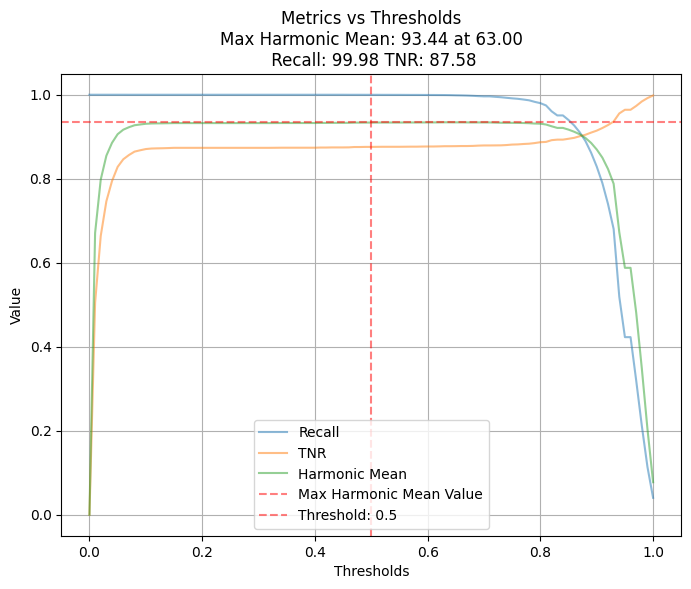

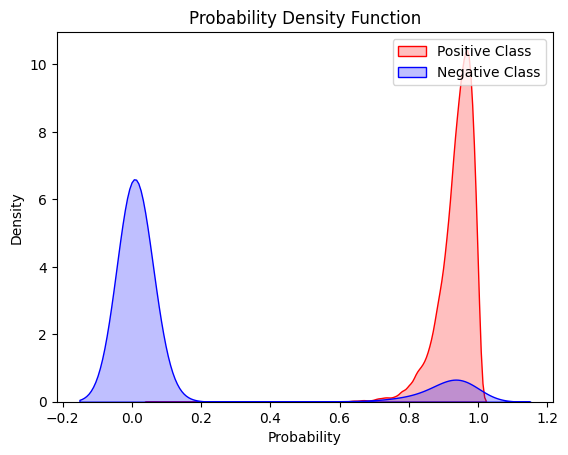

[[ 6165   880]
 [    4 15594]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      7045
           1       0.95      1.00      0.97     15598

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9609592368502407
Recall: 0.9997435568662649
Precision: 0.9465824936263203


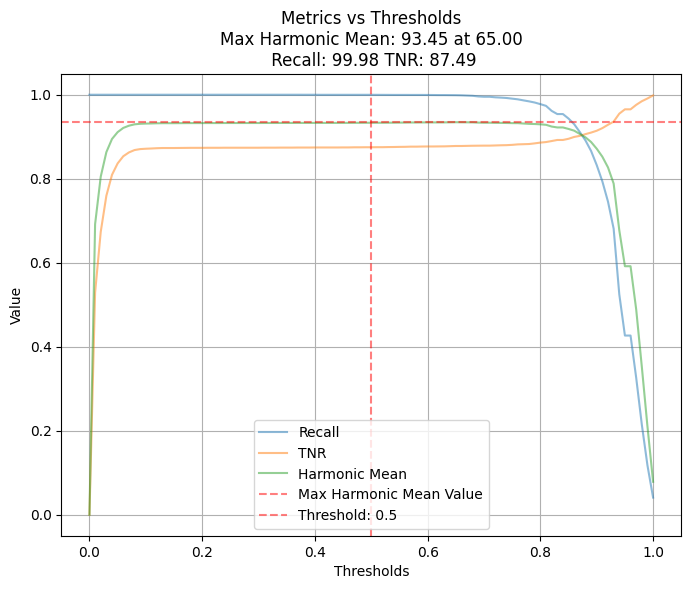

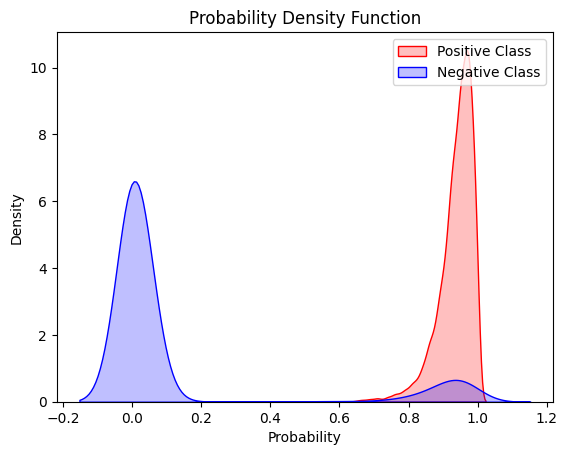

[[ 6227   859]
 [    4 15553]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      7086
           1       0.95      1.00      0.97     15557

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9618866757938436
Recall: 0.9997428810181912
Precision: 0.9476602485985864


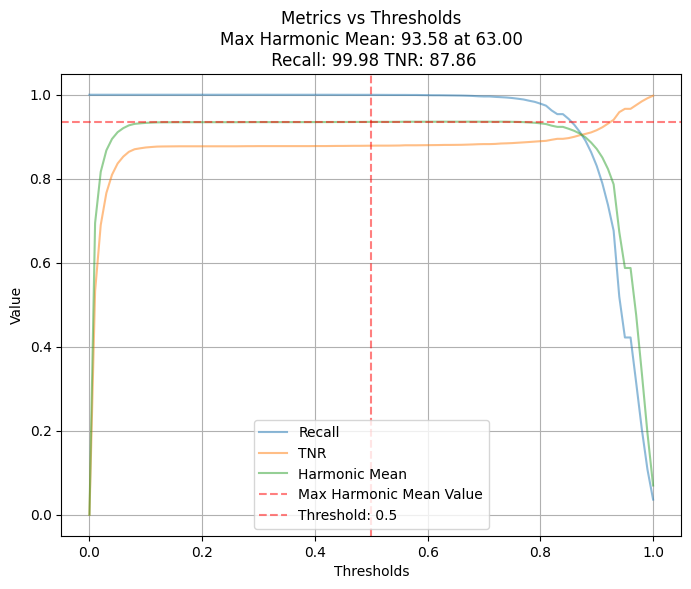

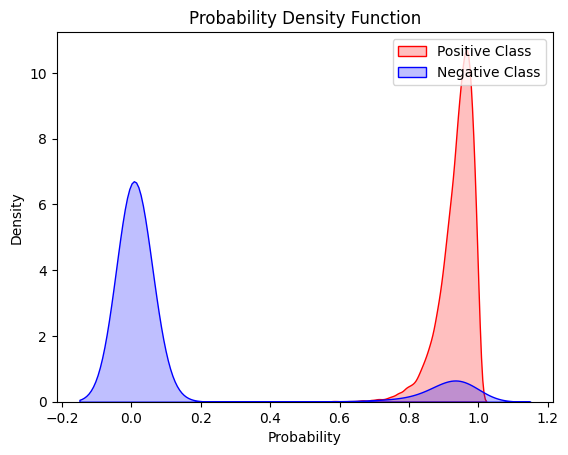

[[ 6170   821]
 [    9 15643]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      6991
           1       0.95      1.00      0.97     15652

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.96     22643
weighted avg       0.97      0.96      0.96     22643

Accuracy: 0.9633440798480767
Recall: 0.9994249936110401
Precision: 0.9501336248785228


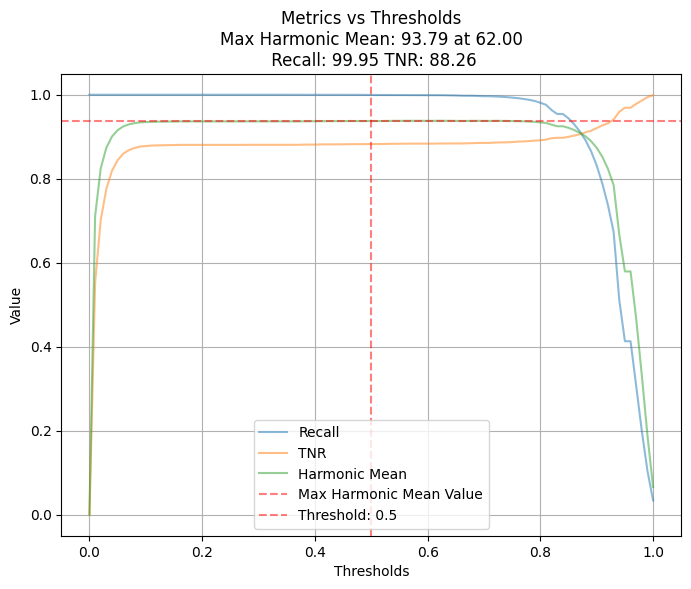

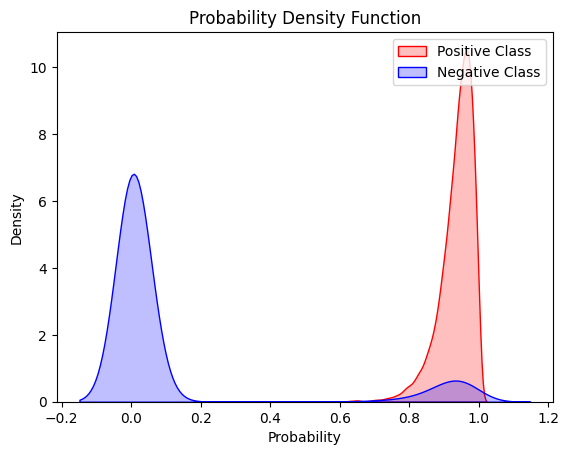

[[ 6267   853]
 [    5 15518]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      7120
           1       0.95      1.00      0.97     15523

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9621074945899395
Recall: 0.9996778973136636
Precision: 0.9478956691710952


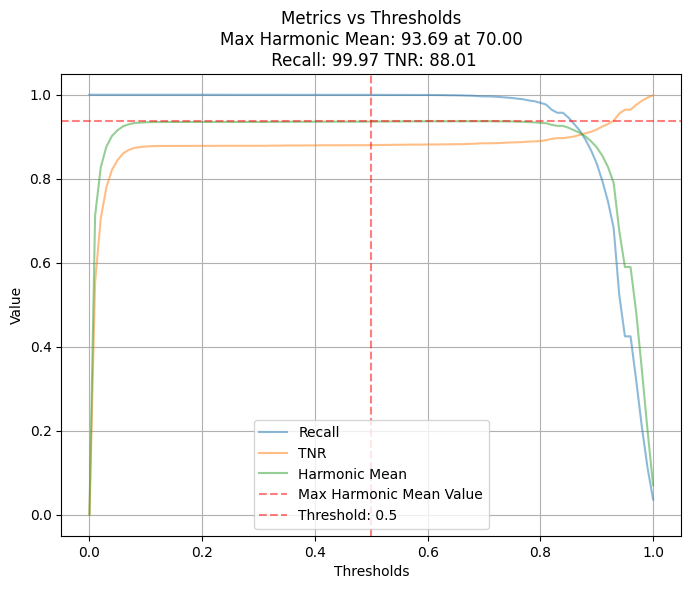

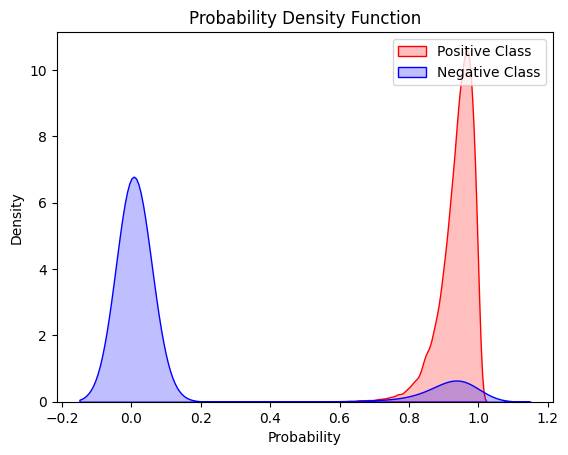

Cross Validation for LogisticRegression


c:\Users\Dell-G5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 6313   915]
 [    0 15416]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7228
           1       0.94      1.00      0.97     15416

    accuracy                           0.96     22644
   macro avg       0.97      0.94      0.95     22644
weighted avg       0.96      0.96      0.96     22644

Accuracy: 0.9595919448860626
Recall: 1.0
Precision: 0.9439715877778458


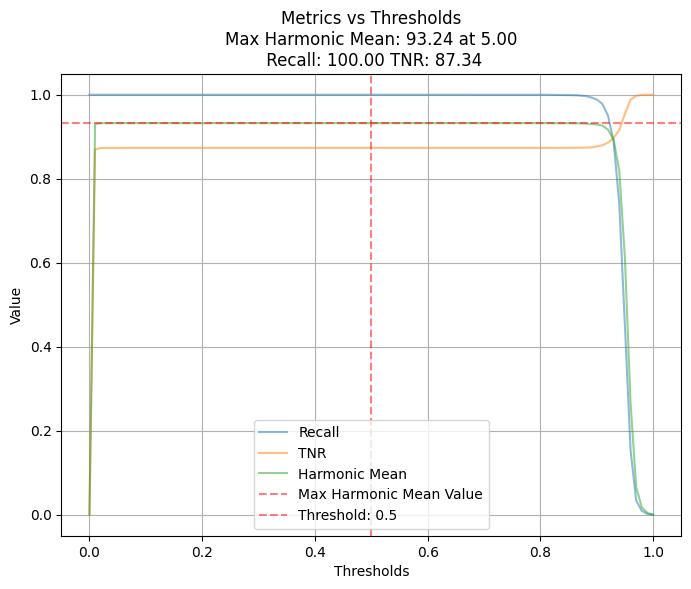

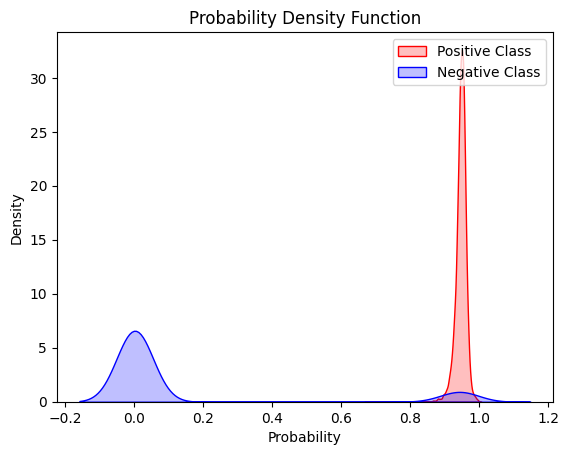

c:\Users\Dell-G5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 6153   892]
 [    0 15598]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7045
           1       0.95      1.00      0.97     15598

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9606059267764873
Recall: 1.0
Precision: 0.9459066100667071


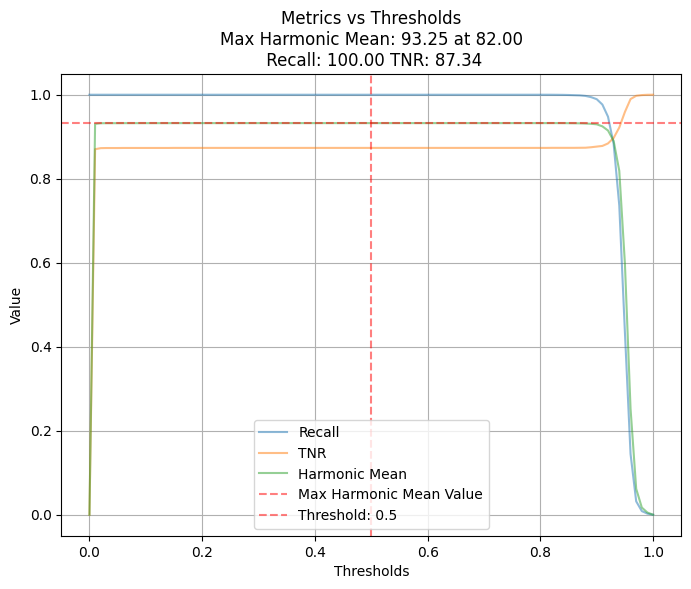

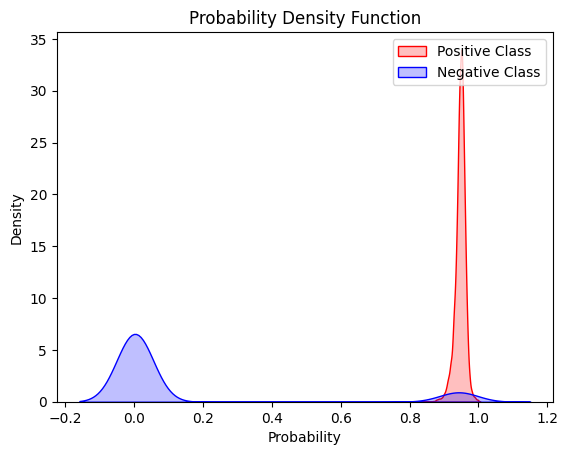

c:\Users\Dell-G5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 6216   870]
 [    1 15556]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      7086
           1       0.95      1.00      0.97     15557

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9615333657200901
Recall: 0.9999357202545478
Precision: 0.9470351881164009


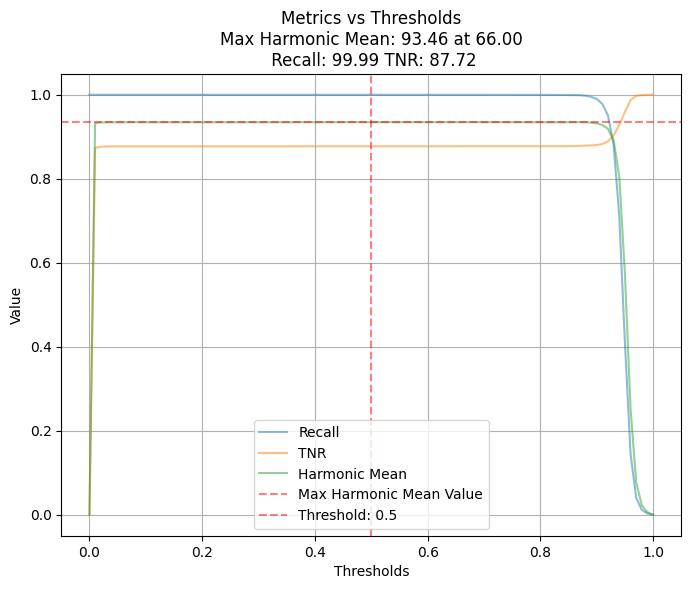

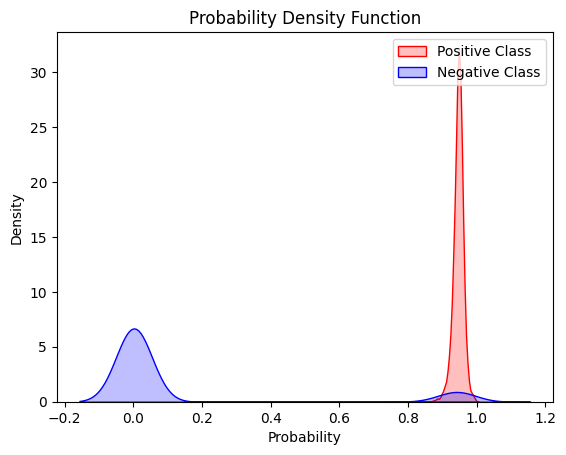

c:\Users\Dell-G5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 6156   835]
 [    0 15652]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      6991
           1       0.95      1.00      0.97     15652

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.96     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9631232610519808
Recall: 1.0
Precision: 0.9493540365136168


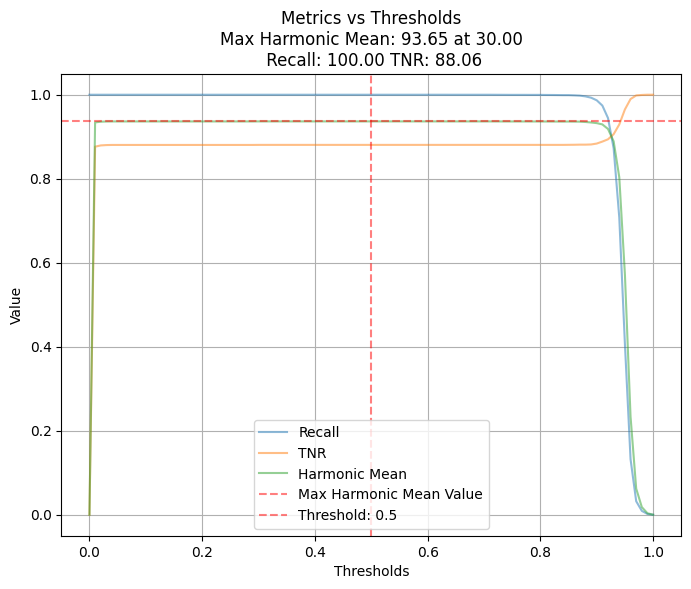

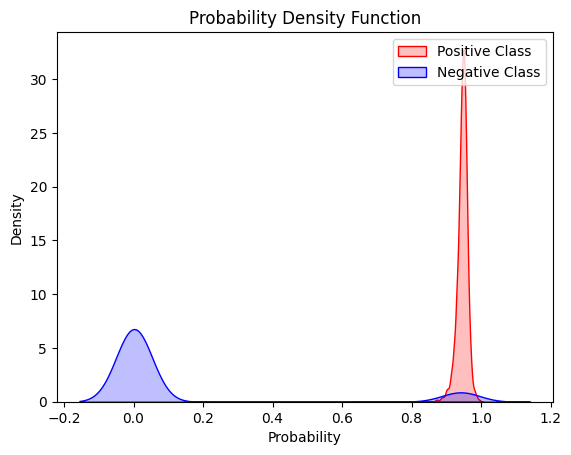

c:\Users\Dell-G5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 6252   868]
 [    0 15523]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      7120
           1       0.95      1.00      0.97     15523

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9616658569977476
Recall: 1.0
Precision: 0.9470441095723263


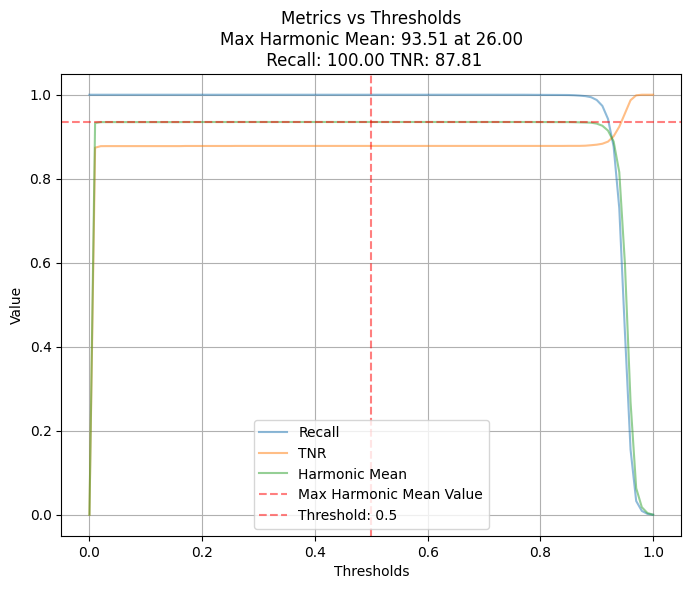

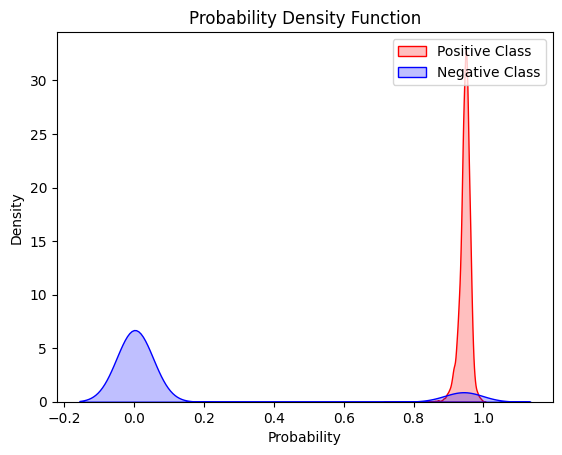

Cross Validation for DecisionTree
[[ 6420   808]
 [ 1090 14326]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7228
           1       0.95      0.93      0.94     15416

    accuracy                           0.92     22644
   macro avg       0.90      0.91      0.90     22644
weighted avg       0.92      0.92      0.92     22644

Accuracy: 0.916180886769122
Recall: 0.9292942397509082
Precision: 0.9466102814853972


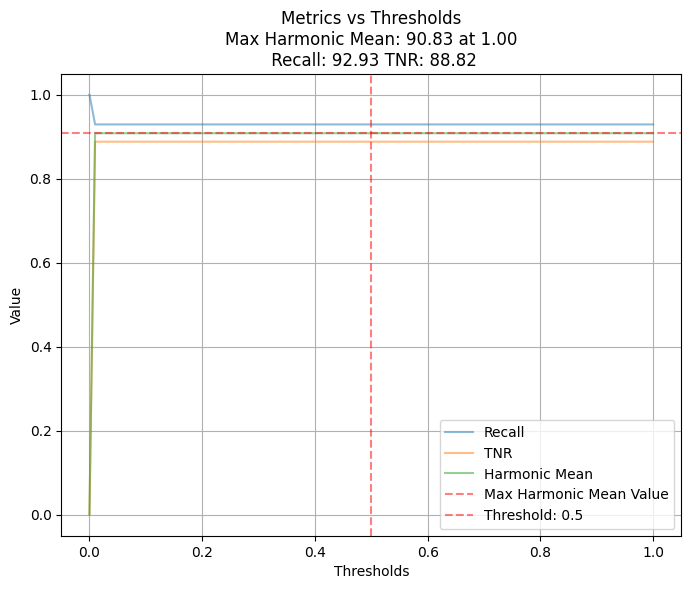

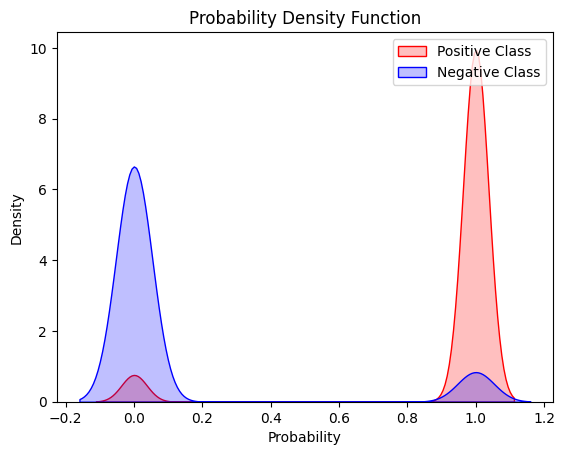

[[ 6255   790]
 [  999 14599]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      7045
           1       0.95      0.94      0.94     15598

    accuracy                           0.92     22643
   macro avg       0.91      0.91      0.91     22643
weighted avg       0.92      0.92      0.92     22643

Accuracy: 0.9209910347568785
Recall: 0.9359533273496602
Precision: 0.9486646305802846


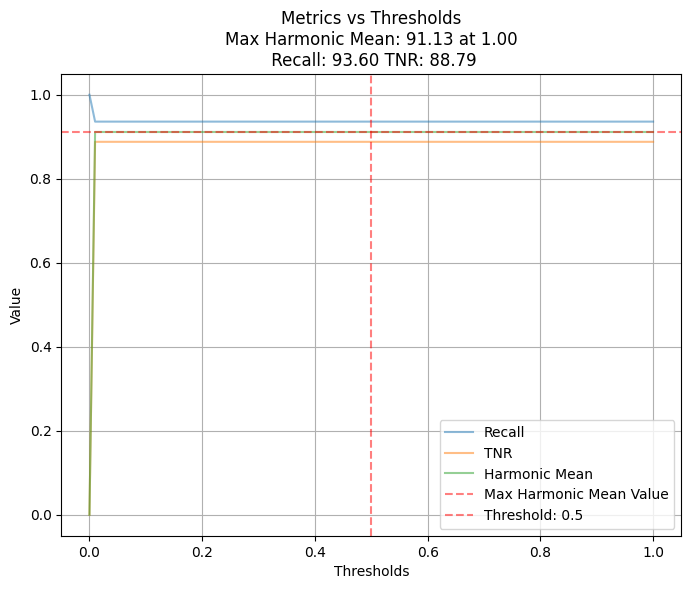

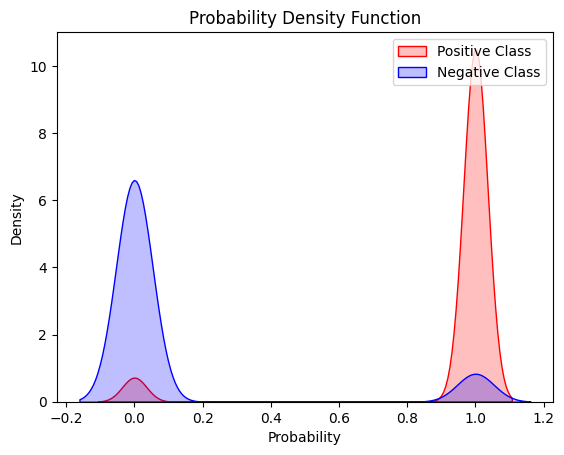

[[ 6320   766]
 [ 1015 14542]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7086
           1       0.95      0.93      0.94     15557

    accuracy                           0.92     22643
   macro avg       0.91      0.91      0.91     22643
weighted avg       0.92      0.92      0.92     22643

Accuracy: 0.921344344830632
Recall: 0.9347560583660088
Precision: 0.9499608048079435


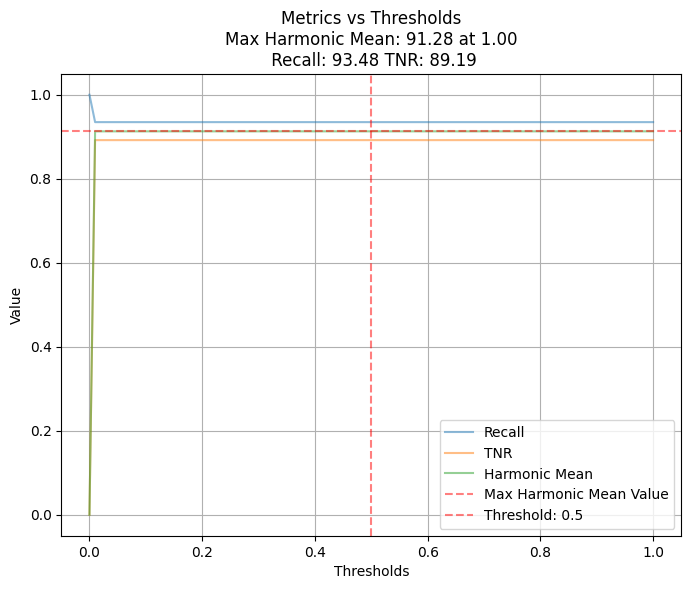

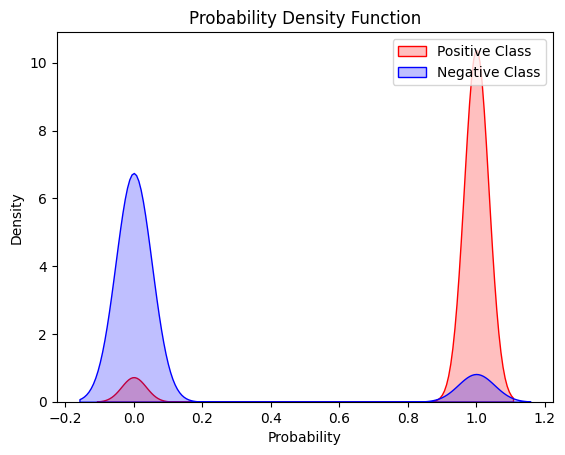

[[ 6256   735]
 [ 1006 14646]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6991
           1       0.95      0.94      0.94     15652

    accuracy                           0.92     22643
   macro avg       0.91      0.92      0.91     22643
weighted avg       0.92      0.92      0.92     22643

Accuracy: 0.9231108951993994
Recall: 0.9357270636340403
Precision: 0.9522137702360055


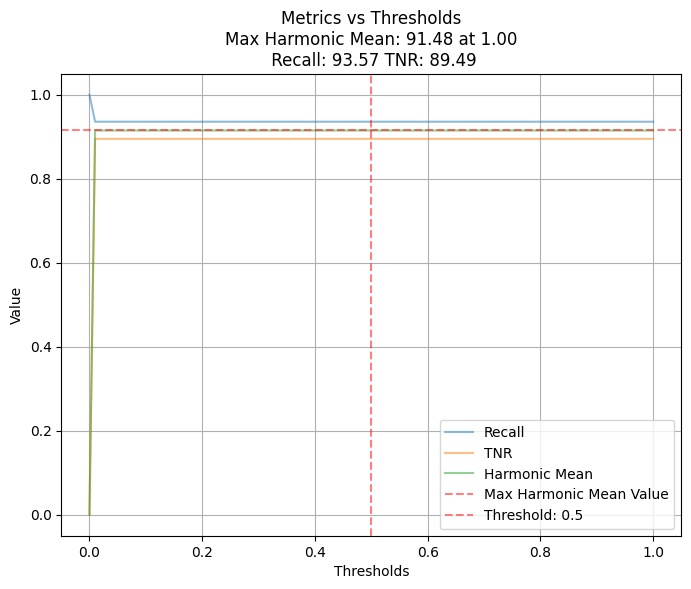

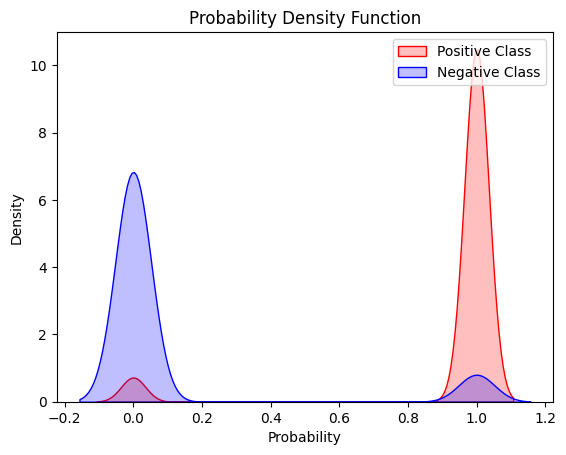

[[ 6362   758]
 [  965 14558]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7120
           1       0.95      0.94      0.94     15523

    accuracy                           0.92     22643
   macro avg       0.91      0.92      0.91     22643
weighted avg       0.92      0.92      0.92     22643

Accuracy: 0.9239058428653447
Recall: 0.937834181537074
Precision: 0.950509271350222


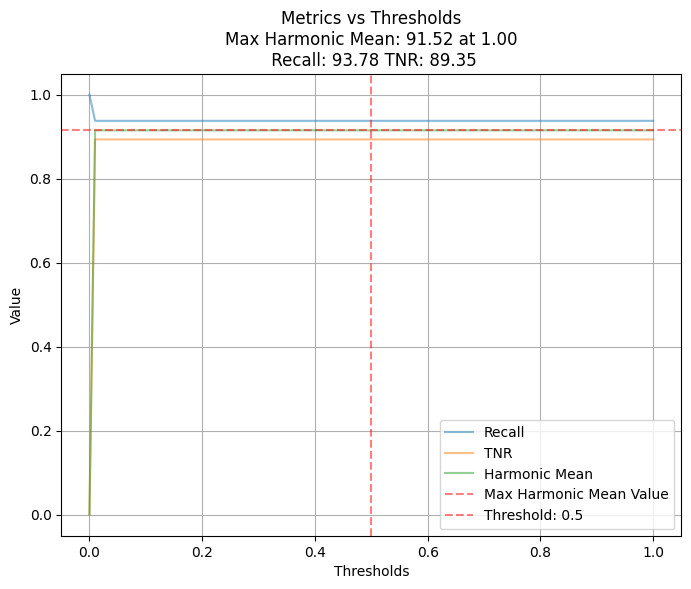

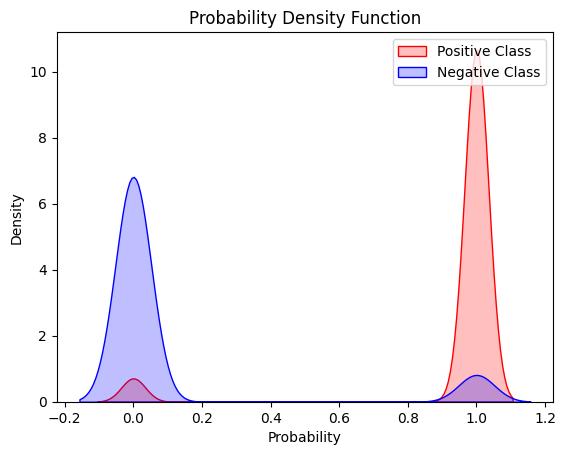

Cross Validation for KNN
[[ 4288  2940]
 [  599 14817]]
              precision    recall  f1-score   support

           0       0.88      0.59      0.71      7228
           1       0.83      0.96      0.89     15416

    accuracy                           0.84     22644
   macro avg       0.86      0.78      0.80     22644
weighted avg       0.85      0.84      0.83     22644

Accuracy: 0.8437113584172408
Recall: 0.9611442656979762
Precision: 0.8344314918060484


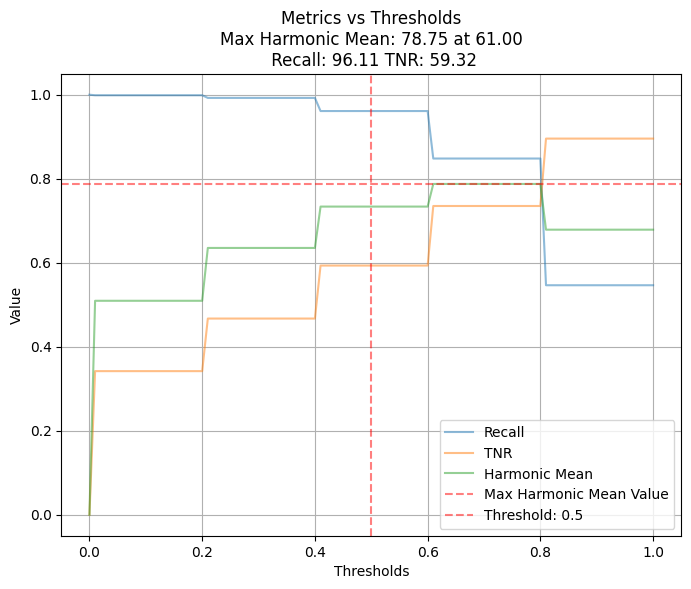

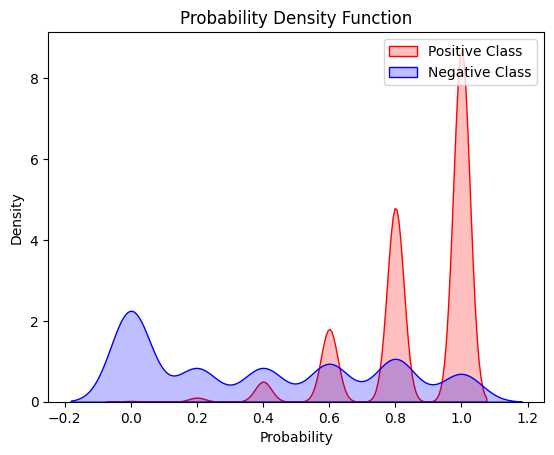

[[ 4202  2843]
 [  609 14989]]
              precision    recall  f1-score   support

           0       0.87      0.60      0.71      7045
           1       0.84      0.96      0.90     15598

    accuracy                           0.85     22643
   macro avg       0.86      0.78      0.80     22643
weighted avg       0.85      0.85      0.84     22643

Accuracy: 0.8475467031753743
Recall: 0.9609565328888319
Precision: 0.8405675190668461


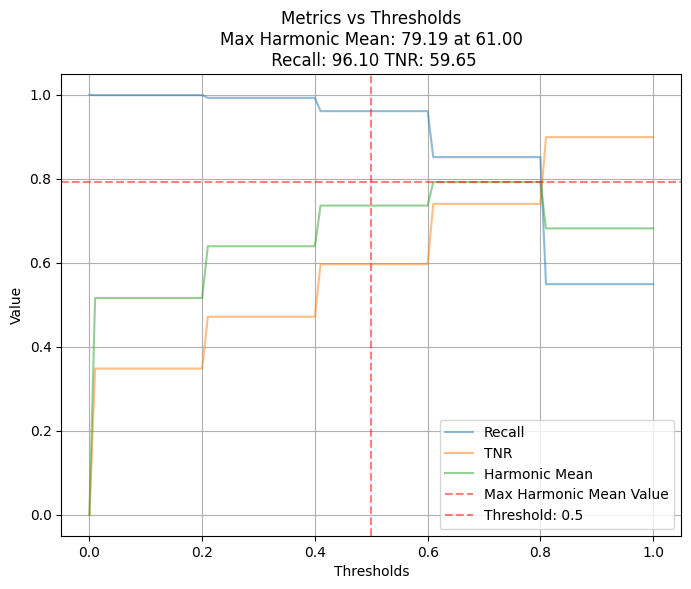

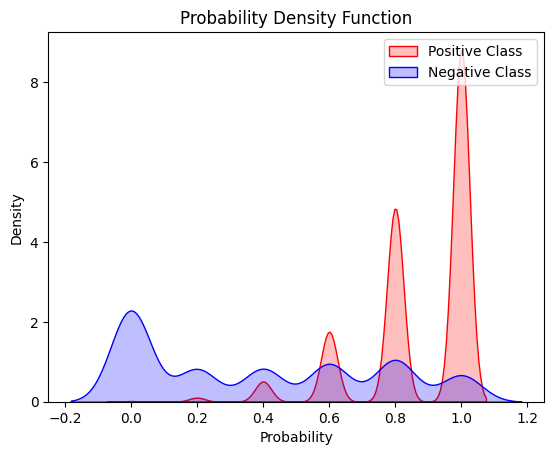

[[ 4223  2863]
 [  623 14934]]
              precision    recall  f1-score   support

           0       0.87      0.60      0.71      7086
           1       0.84      0.96      0.90     15557

    accuracy                           0.85     22643
   macro avg       0.86      0.78      0.80     22643
weighted avg       0.85      0.85      0.84     22643

Accuracy: 0.846045135361922
Recall: 0.9599537185832744
Precision: 0.8391301904815418


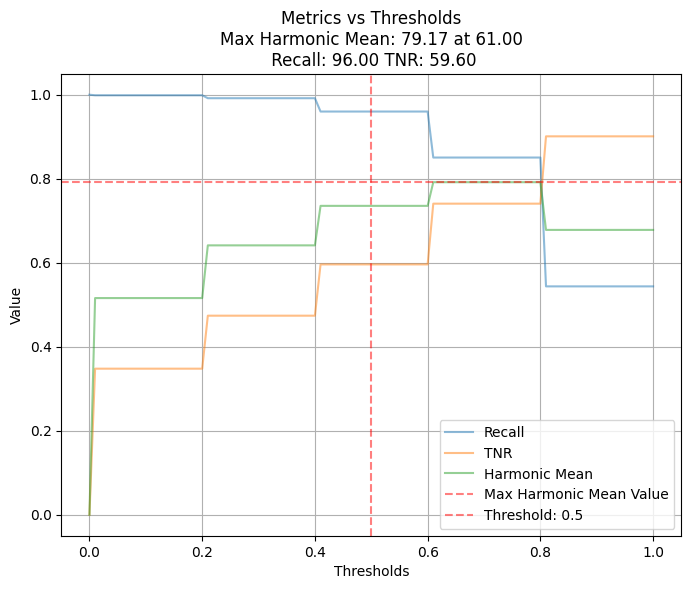

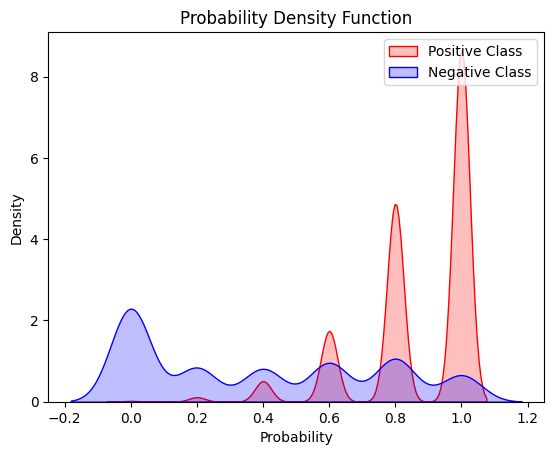

[[ 4243  2748]
 [  554 15098]]
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      6991
           1       0.85      0.96      0.90     15652

    accuracy                           0.85     22643
   macro avg       0.87      0.79      0.81     22643
weighted avg       0.86      0.85      0.85     22643

Accuracy: 0.854171267058252
Recall: 0.9646051622795809
Precision: 0.8460159139302925


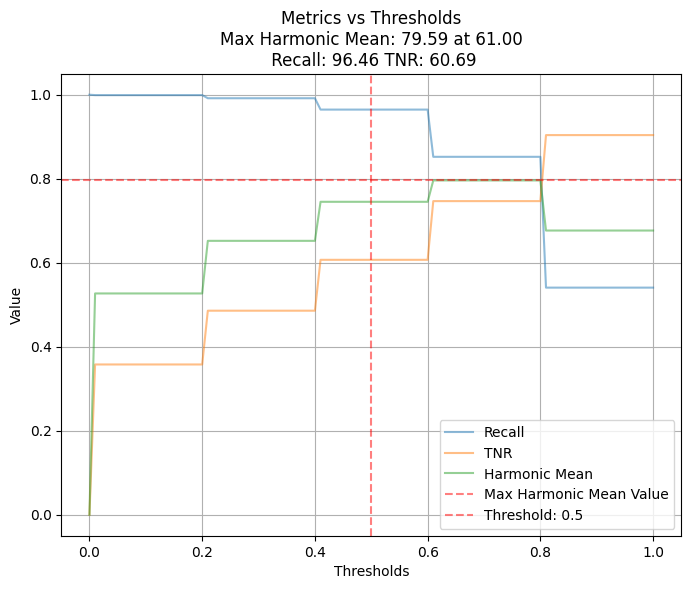

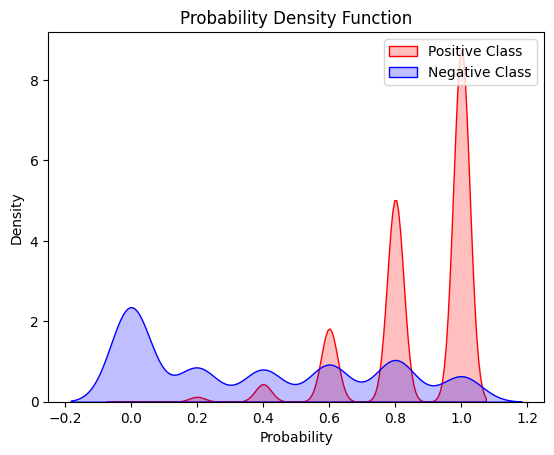

[[ 4230  2890]
 [  565 14958]]
              precision    recall  f1-score   support

           0       0.88      0.59      0.71      7120
           1       0.84      0.96      0.90     15523

    accuracy                           0.85     22643
   macro avg       0.86      0.78      0.80     22643
weighted avg       0.85      0.85      0.84     22643

Accuracy: 0.8474142118977167
Recall: 0.9636023964439864
Precision: 0.8380770954728821


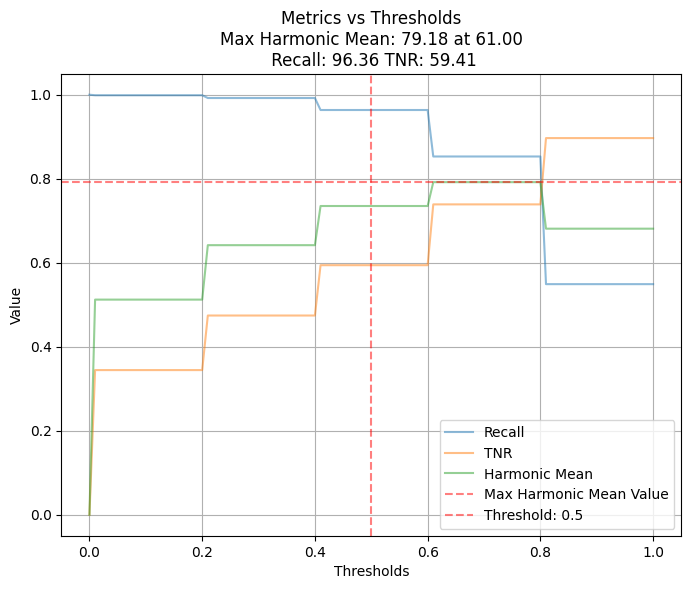

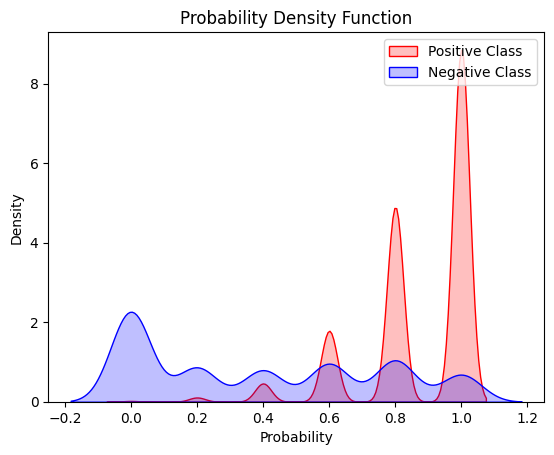

Cross Validation for XGBoost
[[ 6318   910]
 [    8 15408]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7228
           1       0.94      1.00      0.97     15416

    accuracy                           0.96     22644
   macro avg       0.97      0.94      0.95     22644
weighted avg       0.96      0.96      0.96     22644

Accuracy: 0.9594594594594594
Recall: 0.9994810586403736
Precision: 0.9442333619316092


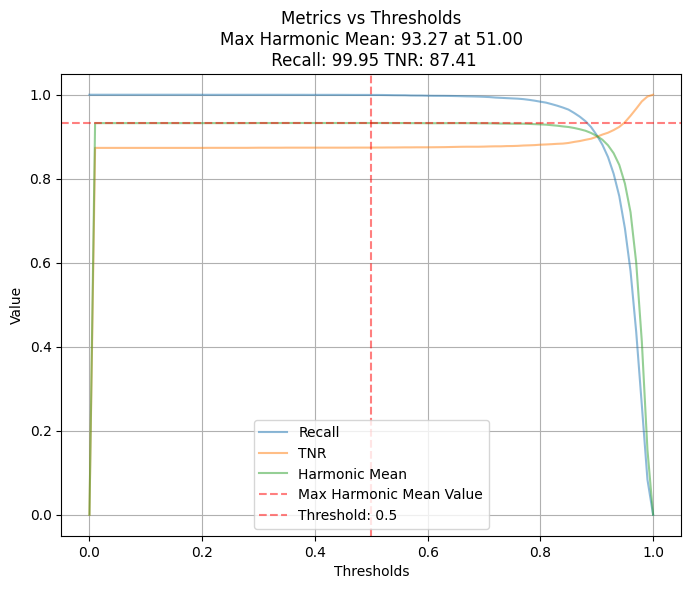

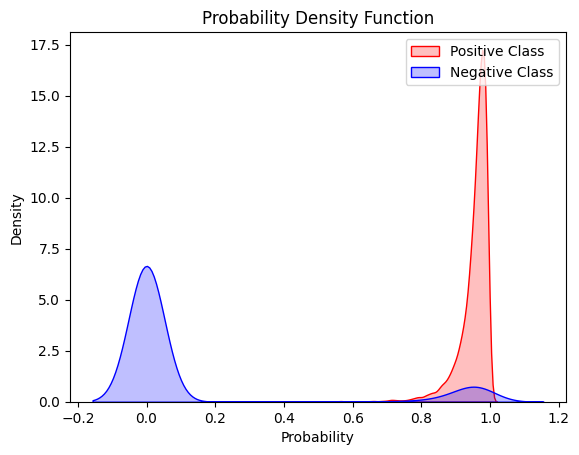

[[ 6159   886]
 [    9 15589]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7045
           1       0.95      1.00      0.97     15598

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9604734354988297
Recall: 0.999423002949096
Precision: 0.9462215477996965


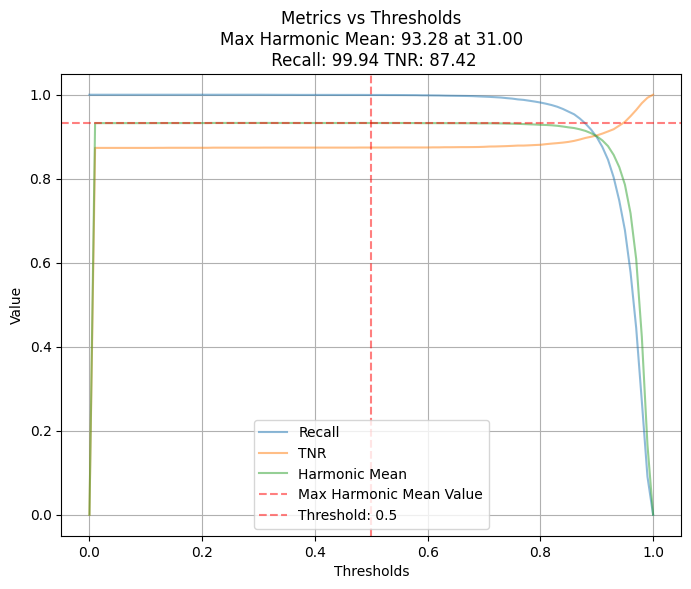

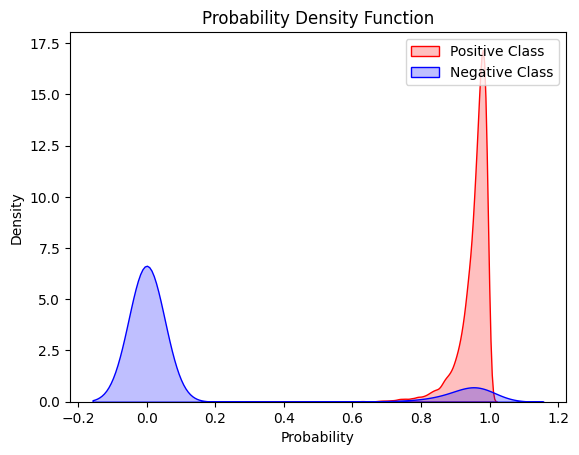

[[ 6222   864]
 [    9 15548]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      7086
           1       0.95      1.00      0.97     15557

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9614450382016517
Recall: 0.9994214822909301
Precision: 0.947355593468194


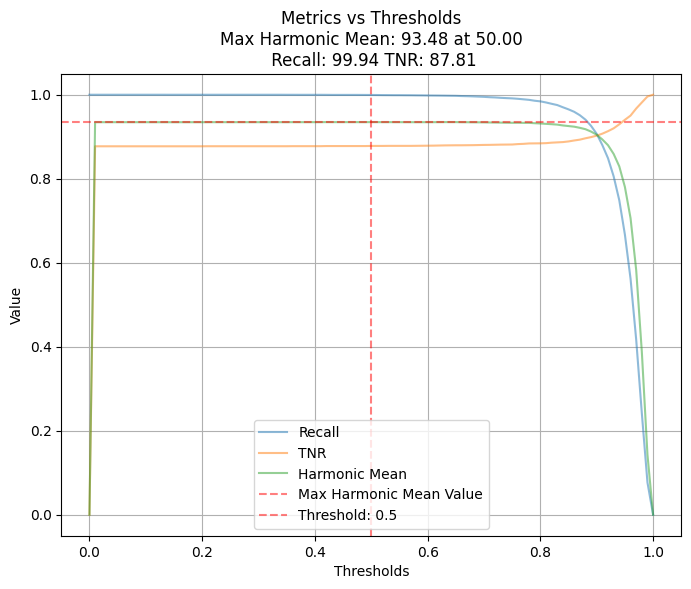

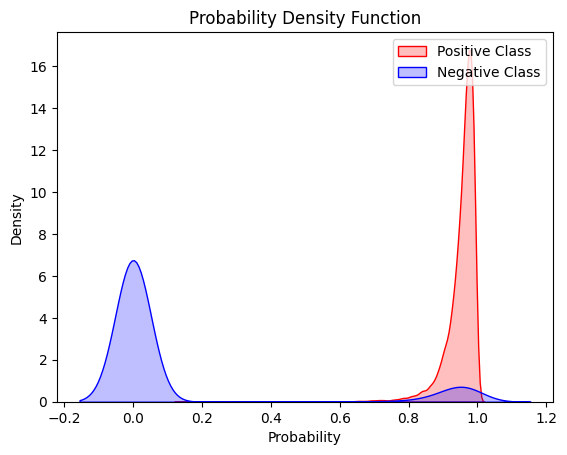

[[ 6164   827]
 [   13 15639]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      6991
           1       0.95      1.00      0.97     15652

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.96     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9629024422558848
Recall: 0.9991694352159468
Precision: 0.9497752945463379


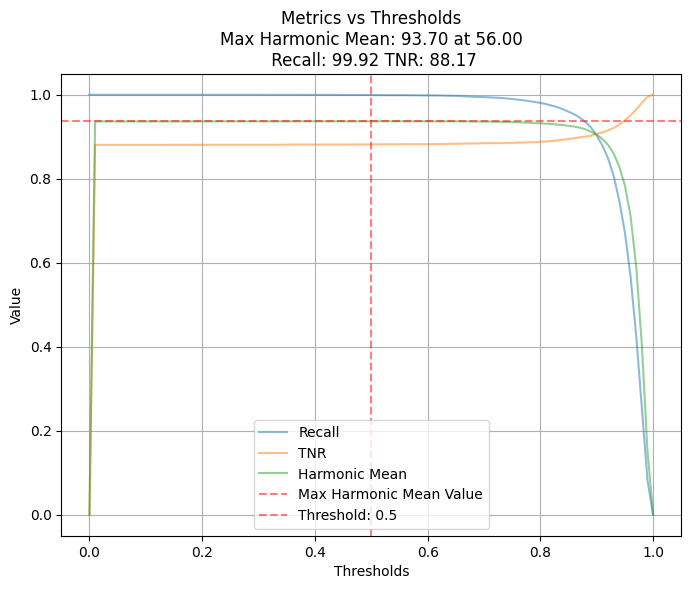

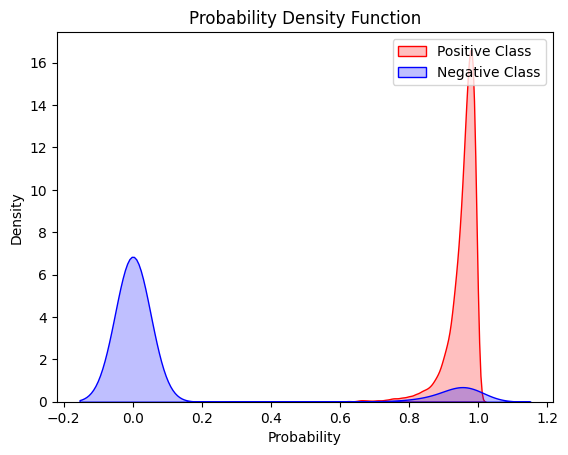

[[ 6260   860]
 [   11 15512]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      7120
           1       0.95      1.00      0.97     15523

    accuracy                           0.96     22643
   macro avg       0.97      0.94      0.95     22643
weighted avg       0.96      0.96      0.96     22643

Accuracy: 0.9615333657200901
Recall: 0.9992913740900599
Precision: 0.9474712924505253


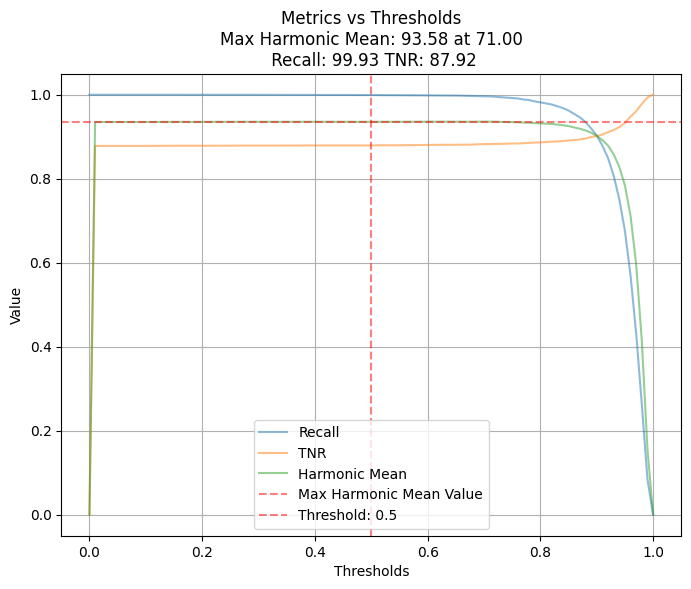

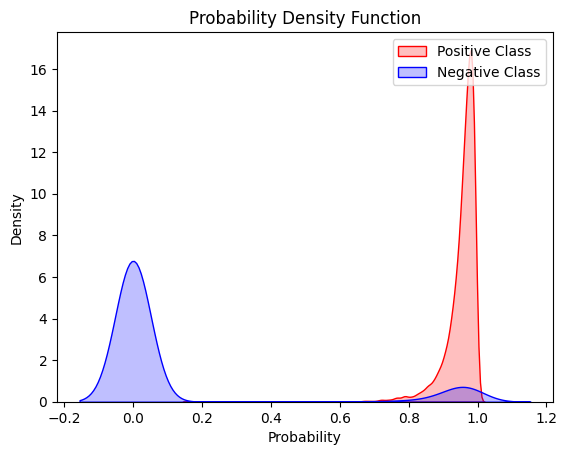

In [13]:
# perform cross validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)


for name, model in models:
    print(f"Cross Validation for {name}")
    for train_index, test_index in cv.split(X_1):
        X_train, X_test, y_train, y_test = X_1.iloc[train_index], X_1.iloc[test_index], y_1.iloc[train_index], y_1.iloc[test_index]

        # scale the data
        if name != "RandomForest":
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        # train the model
        model.fit(X_train, y_train)

        # predict the test set
        y_pred = model.predict(X_test)

        # get the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        # get the classification report
        cr = classification_report(y_test, y_pred)
        print(cr)

        # get the accuracy
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc}")

        # get the recall
        recall = recall_score(y_test, y_pred)
        print(f"Recall: {recall}")

        # get the precision
        precision = precision_score(y_test, y_pred)
        print(f"Precision: {precision}")

        # get the monitoring values
        df = pd.DataFrame(data={"pred": model.predict_proba(X_test)[:, 1], "true": y_test})
        recall_vals, tnr_vals, thresholds, max_harmonic_mean_index = get_monitoring_vals(df)
        plot_threshold_plot(recall_vals, tnr_vals, thresholds, max_harmonic_mean_index)
        kde_plot(df[df["true"] == 1]['pred'], df[df["true"] == 0]['pred'])


Training RandomForest
[[ 6328   900]
 [    2 15414]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      7228
           1       0.94      1.00      0.97     15416

    accuracy                           0.96     22644
   macro avg       0.97      0.94      0.95     22644
weighted avg       0.96      0.96      0.96     22644

Accuracy: 0.9601660484013426
Recall: 0.9998702646600934
Precision: 0.944832659065833


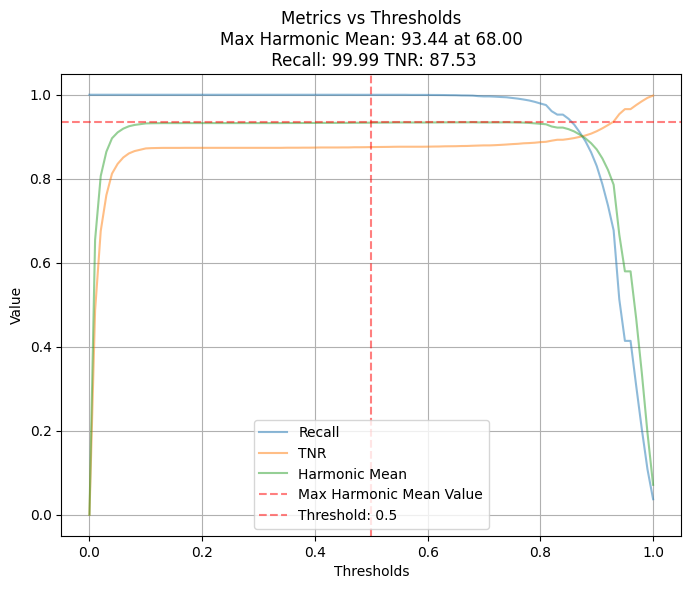

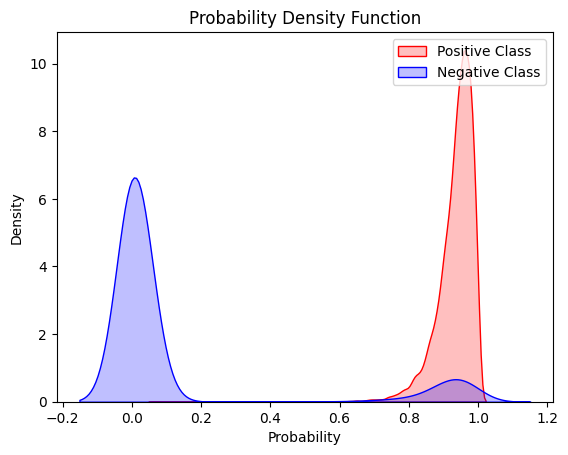

Training LogisticRegression
[[ 6313   915]
 [    0 15416]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7228
           1       0.94      1.00      0.97     15416

    accuracy                           0.96     22644
   macro avg       0.97      0.94      0.95     22644
weighted avg       0.96      0.96      0.96     22644

Accuracy: 0.9595919448860626
Recall: 1.0
Precision: 0.9439715877778458


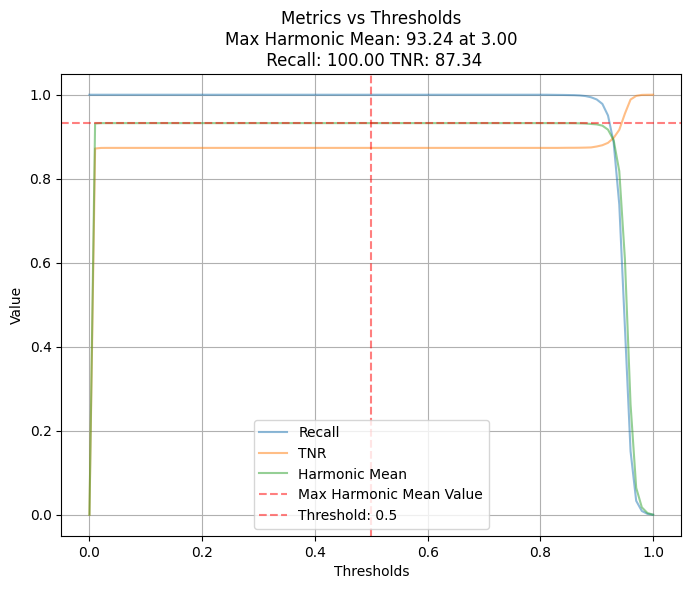

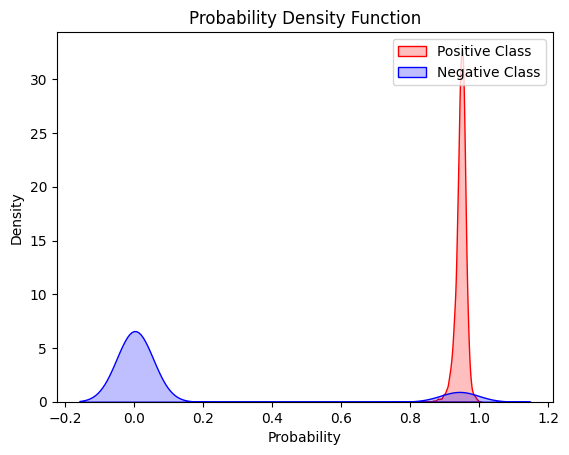

Training DecisionTree
[[ 6414   814]
 [ 1029 14387]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      7228
           1       0.95      0.93      0.94     15416

    accuracy                           0.92     22644
   macro avg       0.90      0.91      0.91     22644
weighted avg       0.92      0.92      0.92     22644

Accuracy: 0.9186097862568451
Recall: 0.9332511676180592
Precision: 0.9464508913887244


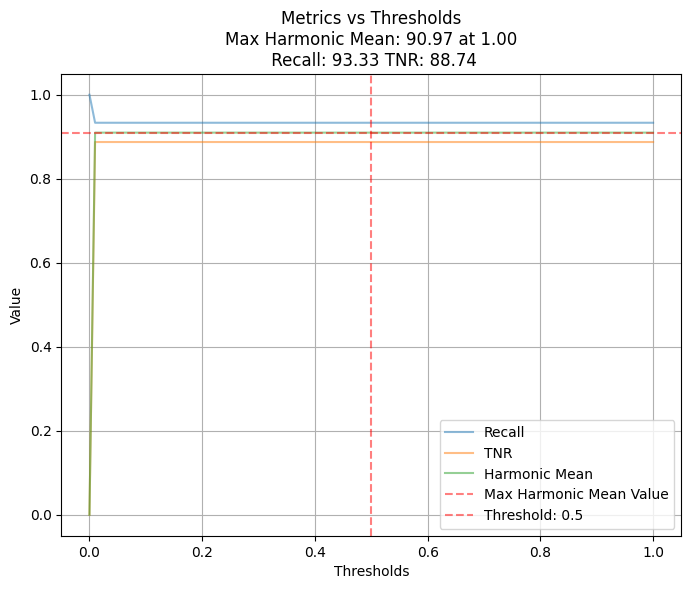

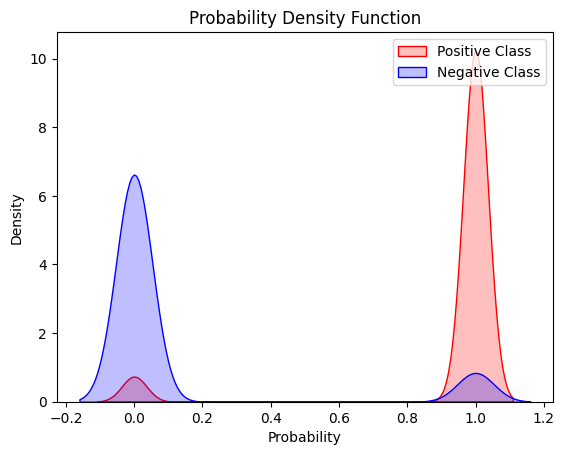

Training KNN
[[ 4157  3071]
 [ 1060 14356]]
              precision    recall  f1-score   support

           0       0.80      0.58      0.67      7228
           1       0.82      0.93      0.87     15416

    accuracy                           0.82     22644
   macro avg       0.81      0.75      0.77     22644
weighted avg       0.82      0.82      0.81     22644

Accuracy: 0.8175675675675675
Recall: 0.931240269849507
Precision: 0.8237791932059448


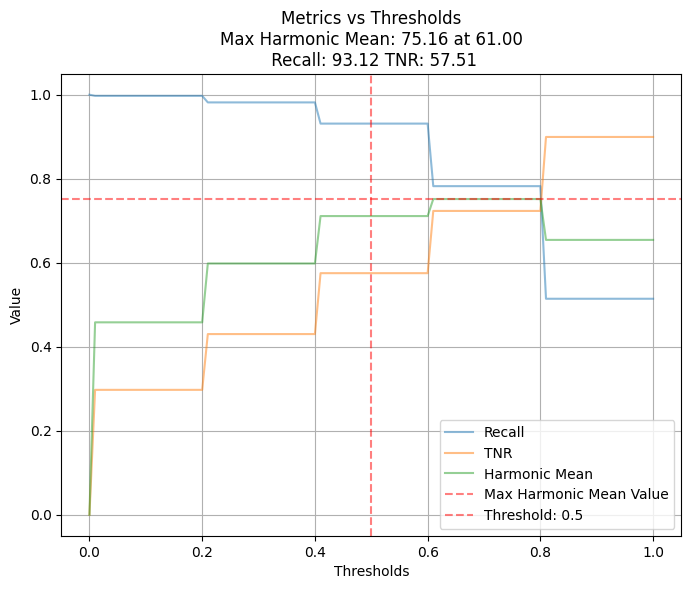

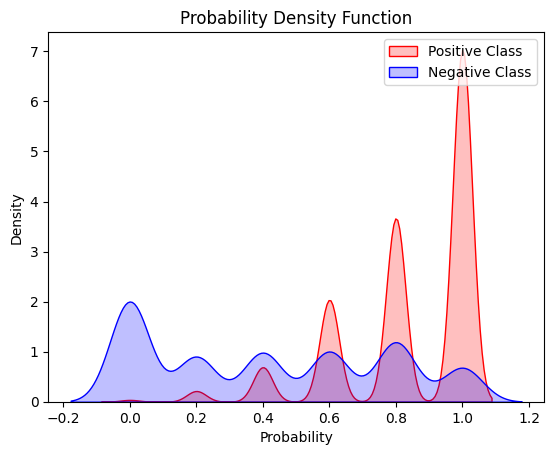

Training XGBoost
[[ 6320   908]
 [    6 15410]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7228
           1       0.94      1.00      0.97     15416

    accuracy                           0.96     22644
   macro avg       0.97      0.94      0.95     22644
weighted avg       0.96      0.96      0.96     22644

Accuracy: 0.9596361066949303
Recall: 0.9996107939802802
Precision: 0.94435592597132


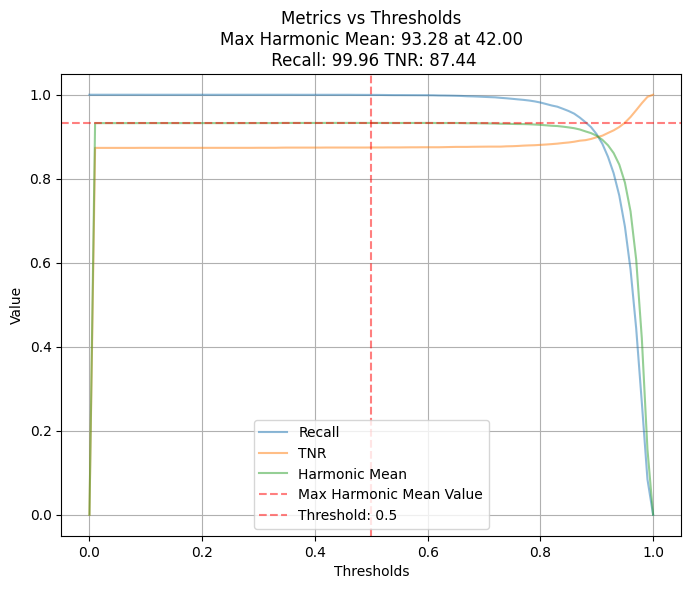

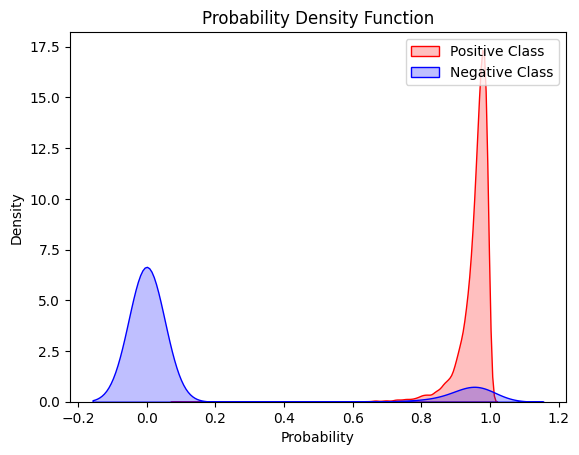

In [13]:
for name, model in models:
    print(f"Training {name}")
    if name != "RandomForest":
        scaler = StandardScaler()
        X_train_1 = scaler.fit_transform(X_train_1)
        X_test_1 = scaler.transform(X_test_1)

    model.fit(X_train_1, y_train_1)

    y_pred_1 = model.predict(X_test_1)

    cm = confusion_matrix(y_test_1, y_pred_1)
    print(cm)

    cr = classification_report(y_test_1, y_pred_1)
    print(cr)

    acc = accuracy_score(y_test_1, y_pred_1)
    print(f"Accuracy: {acc}")

    recall = recall_score(y_test_1, y_pred_1)
    print(f"Recall: {recall}")

    precision = precision_score(y_test_1, y_pred_1)
    print(f"Precision: {precision}")

    df = pd.DataFrame(data={"pred": model.predict_proba(X_test_1)[:, 1], "true": y_test_1})
    recall_vals, tnr_vals, thresholds, max_harmonic_mean_index = get_monitoring_vals(df)
    plot_threshold_plot(recall_vals, tnr_vals, thresholds, max_harmonic_mean_index)
    kde_plot(df[df["true"] == 1]['pred'], df[df["true"] == 0]['pred'])

In [14]:
# save rf model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_1, y_1)
import pickle
with open('model_rf2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [22]:
X_2 = df.drop(columns=['review_score'])
y_2 = df['review_score']

In [24]:
# get a sample where the model predicts chur
model2 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model2.fit(X_2, y_2)
with open('model_review.pkl', 'wb') as f:
    pickle.dump(model2, f)

In [28]:
df['pred'] = model.predict(X_1)


In [31]:
# get the churned customers
df[(df['churn'] == 1 ) & (df['pred'] == 1)]

KeyError: ('order_id', 'customer_id', 'order_item_id', 'product_id', 'seller_id', 'customer_unique_id', 'review_id')

In [ ]:
# 